###**Purpose of the Project**

Online shopping is growing so fast that the global online shopping market size is predicted to hit 4 trillion in 2020. And in the US alone, we’re expecting to have 300 million online shoppers in 2023. That’s 91% of the entire country’s population!So far, 69% of Americans have shopped online, and 25% of Americans shop online at least once per month. The majority (59%) of these shoppers bought clothing items, and 47% bought their first item on Amazon.

When these people buy items on Amazon they want to get the best deal possible and know what other buyers are saying about the product. But an item listed on a website can have thousands of reviews and no one has the time to read all of them. My project takes 2 approaches -
- Generating key words via topic modelling. Key words are those imortant words that the various users have used that describe their experience with product.
- Summarizing the reviews for easy and faster reading

###**Importing Libraries**

In [1]:
import random
random.seed(17)
import pandas as pd
import numpy as np
import datetime
from PIL import *
import PIL.Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string
import nltk
import matplotlib.pyplot as plt
pd.set_option("display.max_colwidth", 200)
import spacy
import gensim
from gensim import corpora
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
%matplotlib inline
import inflect
import itertools
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### **Reading the data**

I am using 59 Reviews scraped from a Wayfair Product Page on Nightstand.

Prodcut Link - https://www.wayfair.com/furniture/pdp/hashtag-home-parson-1-drawer-nightstand-w000106578.html

In [2]:
df=pd.read_excel('Wayfair_comments.xlsx')
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Rating,Comment
0,2017-01-30,4,"This nightstand is pretty good if you're on a budget, and not overly picky about details. I got it in white, so I'm not sure about the other color, but it looks about as expensive as it actually i..."
1,2018-04-16,4,Overall I’m satisfied with my purchase. I ordered two nightstands. One was perfect. The other had a little bit of damage on the corner.
2,2019-01-12,1,I bought two of these nightstands and realized while unboxing that both had damaged pieces. The instructions were also a bit difficult. The Boxing Day price I paid definitely reflects the lack of ...
3,2018-07-20,5,"These nightstands are great! Easy to put together and they are a great height. I love the hole at the top, it’s perfect to put a phone cord through for charging at night without looking like a mess."
4,2018-05-07,3,"I ordered a pair of this nightstand for my bedroom. - Assembly by two people for each nightstand took about 20 minutes. - One of the nightstand was missing the base of the drawer, so we had to cal..."


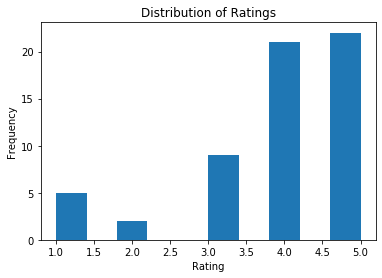

In [3]:
df.Rating.plot(kind='hist')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()

#### **Preprocessing**

Now that we have the data, we are going to clean up the data and remove the commonly used words and words in hashtags and bring all the words to its root words. 
The processes are :-
- Remove hastags
- Remove punctuations
- lowercase
- lemmatize
- remove (), etc

In [0]:
# words to be removed from vocabulary
blockwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at','since','paid','don','doesn','close',
 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'doing', "don't", 'down', 'during',
 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
 "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'like',
 'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", 'also','can','could','should',
 "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'not','bit','much',
 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where','within','quite','really','just','together',
 "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 'hole','furniture','put',
 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', "s'yourself'", 'yourselves', 'drawer','sure',
 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd','nightstand','nightstands','night',
 '4th', '5th', '6th', '7th', '8th', '9th', '10th']

In [0]:
stop_words = set(stopwords.words('english'))                      # set of all stop words
lem=WordNetLemmatizer()
p=inflect.engine()

def process(comment):
  sent = comment.lower()                                          # lower case all words 
  words = nltk.word_tokenize(sent)
  words =  [word for word in words if not word in blockwords]     # remove words present in blockwords
  words = [word for word in words if not word.isdigit()]          # remove digit characters
  words = [word for word in words if len(word) > 3]               # remove words with length less than 3
  words = [word for word in words if word.isalpha()]              # remove non alphabetic words
  words = [lem.lemmatize(word) for word in words]                 # lemmatize words to root word
  sent = ' '.join(words)
  sent = re.sub(r'\(', '', sent)
  sent = re.sub(r'\)', '', sent)
  sent = re.sub(r"'", '', sent)
  return sent

def num_words(sent):                                              # returns number of words in the sentence
  word_tok=nltk.word_tokenize(sent)
  return len(word_tok)

df['Cleaned_Comment']=df['Comment'].apply(process)
df['Unclean_len']=df.Comment.apply(num_words)                     # word length of uncleaned comments
df['Clean_len']=df.Cleaned_Comment.apply(num_words)               # word length of cleaned comments
df['percentage reduction']=(df['Unclean_len']-df['Clean_len'])/df['Unclean_len']*100 # percentage of reduction

In [6]:
df.head()

,Date,Rating,Comment,Cleaned_Comment,Unclean_len,Clean_len,percentage reduction
0,2017-01-30,4,"This nightstand is pretty good if you're on a budget, and not overly picky about details. I got it in white, so I'm not sure about the other color, but it looks about as expensive as it actually i...",pretty good budget overly picky detail white color look expensive actually pro top edge keep thing place cable management built nice charge phone neatly wide compared one good space slide pretty s...,238,68,71.428571
1,2018-04-16,4,Overall I’m satisfied with my purchase. I ordered two nightstands. One was perfect. The other had a little bit of damage on the corner.,overall satisfied purchase ordered perfect little damage corner,30,8,73.333333
2,2019-01-12,1,I bought two of these nightstands and realized while unboxing that both had damaged pieces. The instructions were also a bit difficult. The Boxing Day price I paid definitely reflects the lack of ...,bought realized unboxing damaged piece instruction difficult boxing price definitely reflects lack quality,37,13,64.864865
3,2018-07-20,5,"These nightstands are great! Easy to put together and they are a great height. I love the hole at the top, it’s perfect to put a phone cord through for charging at night without looking like a mess.",great easy great height love perfect phone cord charging without looking mess,44,12,72.727273
4,2018-05-07,3,"I ordered a pair of this nightstand for my bedroom. - Assembly by two people for each nightstand took about 20 minutes. - One of the nightstand was missing the base of the drawer, so we had to cal...",ordered pair bedroom assembly people took minute missing base call wayfair shipped take another week part arrive assembling look crooked closed seems le sturdy issue assembly quality look decent g...,209,60,71.291866


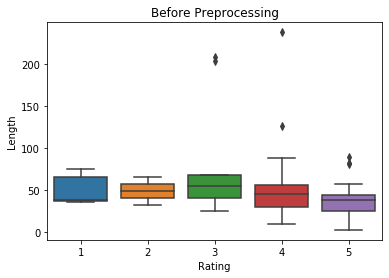

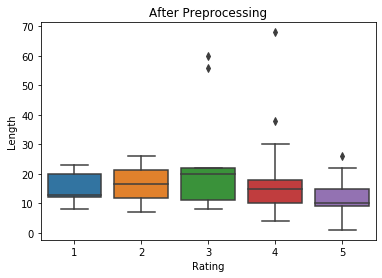

In [7]:
sns.boxplot(x='Rating', y='Unclean_len', data=df, )
plt.ylabel('Length')
plt.title('Before Preprocessing')
plt.show()
sns.boxplot(x='Rating', y='Clean_len', data=df)
plt.ylabel('Length')
plt.title('After Preprocessing')
plt.show()

In [8]:
df.describe()

,Rating,Unclean_len,Clean_len,percentage reduction
count,59.000000,59.000000,59.000000,59.000000
mean,3.898305,53.016949,16.440678,67.307002
std,1.199065,44.276362,12.589365,7.611068
min,1.000000,3.000000,1.000000,43.396226
25%,3.000000,30.000000,9.000000,62.769231
50%,4.000000,41.000000,12.000000,69.491525
75%,5.000000,58.000000,20.000000,72.524510
max,5.000000,238.000000,68.000000,80.000000


### **Top Rated Comments ( 5 Stars)**

We can use word clouds to see the top words used in 5 star comments.

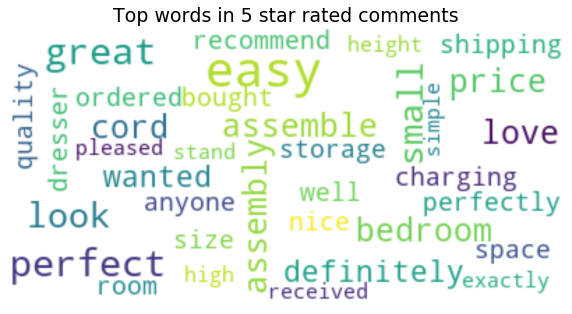

In [9]:
five_rated=df[df['Rating']==5]
text= " ".join(five_rated['Cleaned_Comment'])
# Display the generated image:
wordcloud = WordCloud(max_font_size=35, max_words=35, background_color="white",collocations=False).generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="gaussian")
plt.title('Top words in 5 star rated comments',size=19)
plt.axis("off")
plt.show()

##**Topic Modelling**

Using topic modelling algorithms, we can generate topic words which can be used as keywords for easy searching amongst all the comments.We can also use topic words to describe the product so that customers will get a general opinion of the product from the comments without having to read all the comments.

###**Latent Dirichlet allocation Model**

In [0]:
comments=[]
for i in range(df.shape[0]):
  comments.append(df['Cleaned_Comment'].apply(nltk.word_tokenize).values[i])  # tokenize all the words in all the comments

In [11]:
num_topics = 3 # number of topics

dictionary = corpora.Dictionary(comments) # create a dictionary of all words
doc_term_matrix = [dictionary.doc2bow(rev) for rev in comments]

LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, random_state=100,chunksize=1000, passes=50)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [12]:
lda_model.print_topics() # 3 topics have been generated along with the importance of each word in the topic

[(0,
  '0.020*"easy" + 0.020*"perfect" + 0.015*"look" + 0.013*"bought" + 0.013*"good" + 0.010*"nice" + 0.010*"small" + 0.010*"great" + 0.010*"room" + 0.008*"little"'),
 (1,
  '0.018*"side" + 0.014*"little" + 0.010*"piece" + 0.010*"definitely" + 0.010*"look" + 0.010*"easy" + 0.008*"star" + 0.008*"needed" + 0.008*"price" + 0.008*"cord"'),
 (2,
  '0.023*"look" + 0.015*"easy" + 0.013*"assembly" + 0.011*"instruction" + 0.011*"side" + 0.011*"nice" + 0.011*"part" + 0.011*"small" + 0.009*"time" + 0.009*"edge"')]

In [0]:
topic_words=[] 
for i in range(num_topics):
  for j in range(25):
    try:
        topic_words.append(lda_model.print_topic(topicno=i).split('+')[j].split('"')[1]) # get all topic words
    except:
      pass

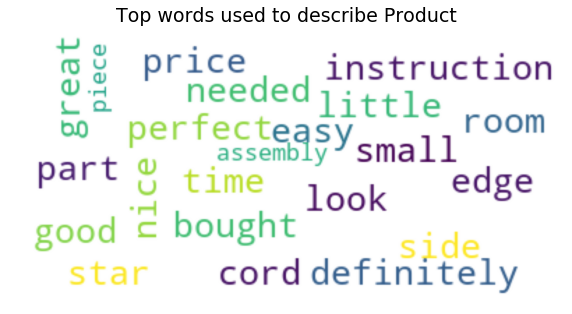

In [14]:
topic_words=list(set(topic_words))
text= " ".join(topic_words)
# Display the generated image:
wordcloud = WordCloud(max_font_size=25, max_words=len(topic_words), background_color="white",collocations=False).generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="gaussian")
plt.title('Top words used to describe Product',size=19)
plt.axis("off")
plt.show()

These words can then be shown next to the product or above the comments so the customer can get an overview of what people are saying about the product thereby reducing their time to read through the various comments.

To get a more visual and dynamic representation, we can use PyLDA vis to visualize the words in each topic.

In [15]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.091486 -0.026813       1        1  38.643349
2     -0.074976 -0.049527       2        1  34.984825
0     -0.016510  0.076340       3        1  26.371819, topic_info=    Category      Freq       Term     Total  loglift  logprob
62   Default  6.000000    perfect  6.000000  30.0000  30.0000
65   Default  4.000000     bought  4.000000  29.0000  29.0000
248  Default  5.000000       room  5.000000  28.0000  28.0000
158  Default  2.000000     simple  2.000000  27.0000  27.0000
144  Default  2.000000    pleased  2.000000  26.0000  26.0000
..       ...       ...        ...       ...      ...      ...
63    Topic3  1.520862   purchase  3.980906   0.3706  -5.1251
163   Topic3  1.445704     wanted  3.960685   0.3251  -5.1758
288   Topic3  1.442009       work  3.276891   0.5120  -5.1784
143   Topic3  1.442636  perfectly  4.677052   0.1567  -5.1780
189   Topic3  1.442074       size  3.976878   0.3185  -5.1783

[194 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         2  0.740331  actually
260       1  0.968044     adult
228       2  0.387876    anyone
228       3  0.387876    anyone
128       3  0.781363      area
...     ...       ...       ...
288       2  0.305167      work
288       3  0.305167      work
326       1  0.723069     wrong
225       1  0.968039      year
57        2  0.740331  yourself

[229 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

## **Review Summarizer**

-  Summarize Large reviews for easy reading 

In [0]:
import base64
import string
import re
from collections import Counter
from time import time
import heapq
from nltk.corpus import stopwords
import nltk
stopwords = stopwords.words('english')
sns.set_context('notebook')

In [0]:
df=pd.read_excel('Wayfair_comments.xlsx')
df['Date']=pd.to_datetime(df['Date'])
hi_rated=df[(df['Rating']==5)|(df['Rating']==4)]
hi_rated=hi_rated.reset_index()
hi_rated=hi_rated.drop('index',axis=1)

In [18]:
!python -m spacy download en
nlp = spacy.load('en_core_web_sm')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


#### Normalizing Text

In [0]:
def normalize_text(text): # normalize the text by cleaning it and preprocessing it
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>©', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", "")



#### Removing pronouns and Stopwords

In [0]:
punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~©'
# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    doc = nlp(docs, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)
    return pd.Series(texts)
    
hi_rated['Cleaned']=hi_rated['Comment'].apply(normalize_text)
hi_rated['normalize'] = hi_rated['Cleaned'].apply(lambda x: cleanup_text(x, False))

In [21]:
print('Before normalizing text-----\n')
print(hi_rated['Comment'][4])
print('\nAfter normalizing text-----\n')
print(hi_rated['normalize'][4])

Before normalizing text-----

It is a very small nightstand, which is what I wanted for the small space I had between the bed and the wall. Putting it together was quite simple as well. It is definitely not high end quality, but for the price it was exactly what I wanted. It did remind me quite a bit of the quality of furniture you get from like a Target or Walmart but with a nicer look to it.

After normalizing text-----

small nightstand want small space bed wall . put together quite simple well . definitely high end quality price exactly want . remind quite bit quality furniture get like target walmart nicer look .


#### **Text Summary**

In [0]:
# this is function for text summarization
def generate_summary(text_without_removing_dot, cleaned_text):
    sample_text = text_without_removing_dot
    doc = nlp(sample_text)
    sentence_list=[]
    for idx, sentence in enumerate(doc.sents): # we are using spacy for sentence tokenization
        sentence_list.append(re.sub(r'[^\w\s]','',str(sentence)))

    stopwords = nltk.corpus.stopwords.words('english')

    word_frequencies = {}  
    for word in nltk.word_tokenize(cleaned_text):  
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1


    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)


    sentence_scores = {}  
    for sent in sentence_list:  
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 20:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]


    summary_sentences = heapq.nlargest(2, sentence_scores, key=sentence_scores.get)

    summary = ' '.join(summary_sentences)
    print('\nSummarized Comment:\n')
    print(summary)  

In [23]:
n=29
print('Original Comment \n')
print(hi_rated['Comment'][n])
generate_summary(hi_rated['normalize'][n], hi_rated['Cleaned'][n])


Original Comment 

Love them! They’re so compact yet made the room complete. It was easy to set up and within 45 mins I had both nightstands our together. I wish everything I bought was that simple.

Summarized Comment:

easy set within 45 min nightstand together  love compact yet make room complete 


This review summarizer feature is useful when there are huge comments and we dont want to read the entire comment. Just passing the comment to the summarizer will give you the highlights of the comment so you can continue with your shopping.